In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Phase 1: Data Collection and Preparation**

In [2]:
#1.1 Load the dataset into pandas Dataframe.
url = "https://raw.githubusercontent.com/Naeema-cyber/dataset_sample/refs/heads/main/home_loan_train.csv"

home_loan = pd.read_csv(url)
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
home_loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
home_loan.shape

(614, 13)

In [5]:
home_loan.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


**1.2 Data inspection**

In [6]:
# Checking for the data type of Dependents
home_loan["Dependents"].unique

<bound method Series.unique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>

In [7]:
home_loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
# Checking the dataframe for missing values, duplicates, and data types inconsistencies.
home_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
home_loan.duplicated().sum()

np.int64(0)

In [10]:
# Checking for missing values
home_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
home_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# Copying the data

df = home_loan.copy()

**1.3 Data cleaning**

In [13]:
 # Clean the dataset by handling missing values, correcting data types, and addressing outliers.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
# Correcting the data type of ApplicantIncome from int64 to float64
df["ApplicantIncome"] = df["ApplicantIncome"].astype(float)

In [15]:
# Create dictionaries to store the fill values for each group of columns
median_fills = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].median()
mode_fills = df[['Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents', 'Self_Employed']].mode().iloc[0]
# Combine the dictionaries into a single dictionary for `fillna()`
fill_values = median_fills.to_dict()
fill_values.update(mode_fills.to_dict())
# Fill the missing values in one call
df1_copy = df.fillna(value=fill_values)

In [16]:
# Addressing the outliers

# numeric columns with outliers
num_cols = df.select_dtypes(include=np.number).columns
iqr_out_counts = {}
iqr_masks = []
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    mask = (df[col] < lower) | (df[col] > upper)
    
    iqr_out_counts[col] = mask.sum()
    
    iqr_masks.append(mask)
    
iqr_out_counts = pd.Series(iqr_out_counts)
print("Outlier counts by column (IQR rule):")
print(iqr_out_counts[iqr_out_counts > 0] if iqr_out_counts.sum() > 0 else "No IQR outliers detected")
print()


Outlier counts by column (IQR rule):
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           39
Loan_Amount_Term     88
Credit_History       89
dtype: int64



In [17]:
# Rows with any IQR outlier
any_iqr_out = pd.concat(iqr_masks, axis=1).any(axis=1)
rows_with_iqr_outliers = df[any_iqr_out]
print(f"Number of rows with IQR outlier: {len(rows_with_iqr_outliers)}")
display(rows_with_iqr_outliers.head())


Number of rows with IQR outlier: 216


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299.0,1086.0,17.0,120.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596.0,0.0,100.0,240.0,NaN,Urban,Y


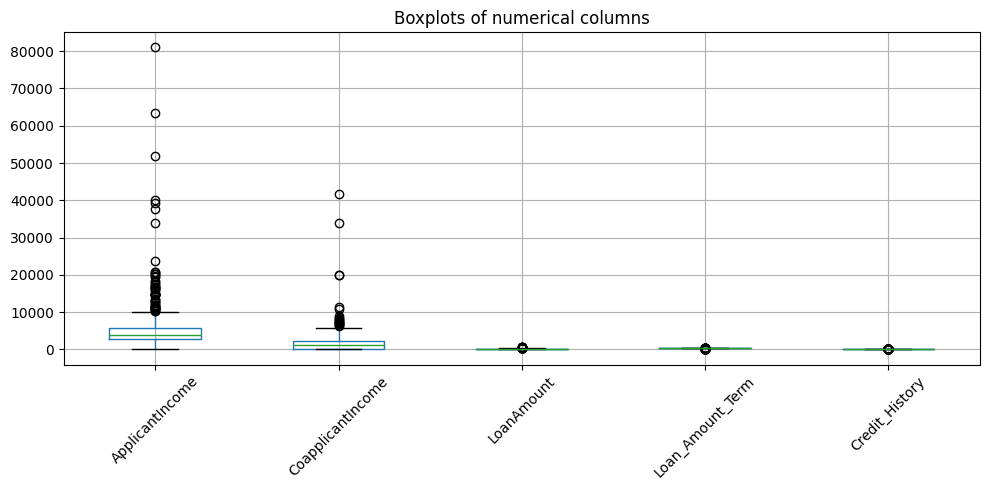

In [18]:
#Boxplot visualization for numeric columns
plt.figure(figsize=(10, 5))
df[num_cols].boxplot(rot=45)
plt.title("Boxplots of numerical columns")
plt.tight_layout()
plt.show()

In [19]:
# IQR Capping (Winsorization)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Cap values outside the bounds
    df[col] = np.where(df[col] < lower, lower,
                     np.where(df[col] > upper, upper, df[col]))


In [20]:
# IQR-based check AFTER capping
iqr_out_counts_new = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_out_counts_new[col] = ((df[col] < lower) | (df[col] > upper)).sum()
iqr_out_counts_new = pd.Series(iqr_out_counts_new)
print("\nOutlier counts by column AFTER capping (IQR rule):")
print(iqr_out_counts_new[iqr_out_counts_new > 0] if iqr_out_counts_new.sum() > 0 else "No IQR outliers detected")



Outlier counts by column AFTER capping (IQR rule):
No IQR outliers detected


In [21]:
# Compare with previous IQR counts if available
if 'iqr_out_counts' in globals():
    compare_iqr = pd.concat(
        [iqr_out_counts.rename('before'), iqr_out_counts_new.rename('after')],
        axis=1
    )
    print("\nComparison of IQR outlier counts (before vs after capping):")
    display(compare_iqr)
else:
    print("No previous IQR outlier counts found.")


Comparison of IQR outlier counts (before vs after capping):


,before,after
ApplicantIncome,50,0
CoapplicantIncome,18,0
LoanAmount,39,0
Loan_Amount_Term,88,0
Credit_History,89,0


### **Phase 2: Exploratory Data Analysis (EDA)**

**Task 2.1:** Conduct descriptive statistics to summarize the key characterisitics of the data

In [22]:
# 2.1
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,4617.111564,2479.851729,150.0,2877.5,3812.5,5795.00,10171.250
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.0,1188.5,2297.25,5743.125
LoanAmount,592.0,138.288851,58.059973,9.0,100.0,128.0,168.00,270.000
Loan_Amount_Term,600.0,360.000000,0.000000,360.0,360.0,360.0,360.00,360.000
Credit_History,564.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.000


In [51]:
# 2.2
# Let's visualize the distributions of the numerical features using histogram and box plots.
def correlation_with_target(df, target_col, figsize=(10,2)):
    numeric_columns = df.select_dtypes(include='number').copy()
    if target_col not in numeric_columns.columns:
        raise ValueError(f"Target column '{target_col}' must be present in the dataframe.")
    corrs = numeric_columns.corrwith(numeric_columns[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}    
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

c:\Users\Dell\Desktop\ai_engineering_repo\my_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Dell\Desktop\ai_engineering_repo\my_venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


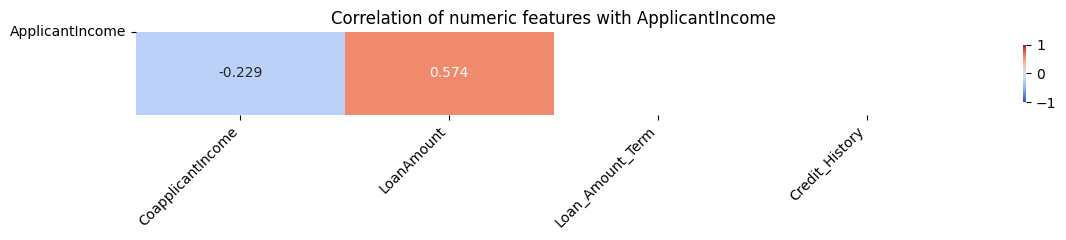

LoanAmount           0.573764
CoapplicantIncome   -0.228956
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64


In [53]:
corr_series = correlation_with_target(df, 'ApplicantIncome', figsize=(12,2.5))
print(corr_series)

From the graph above, we can see that only CoApplicantIncome and LoanAmount are the only ones that are correlated with the ApplicantIncome.

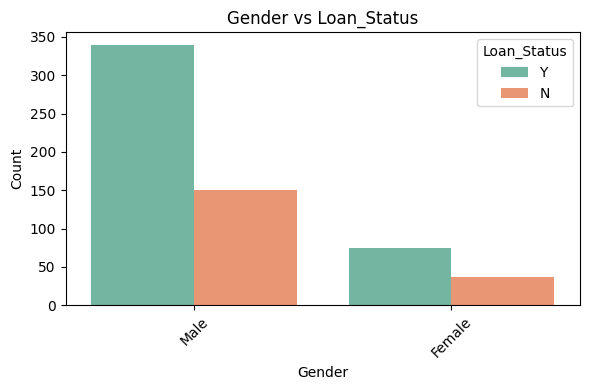

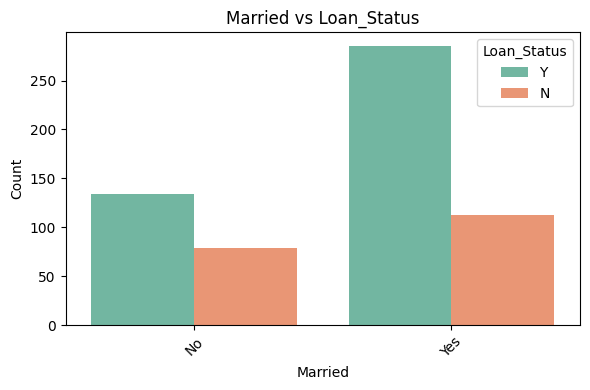

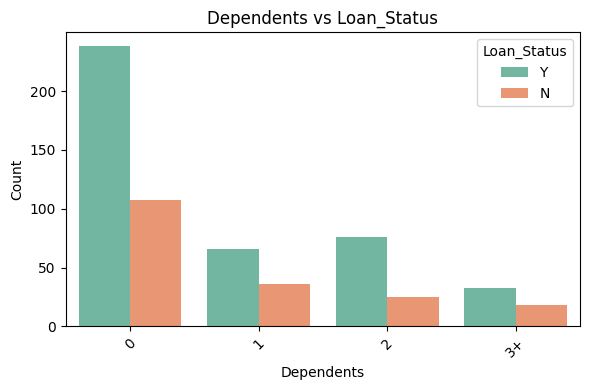

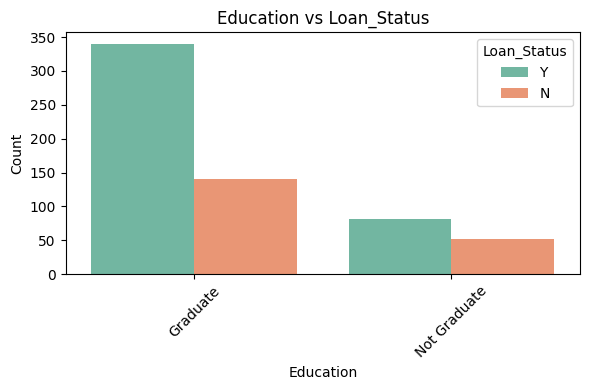

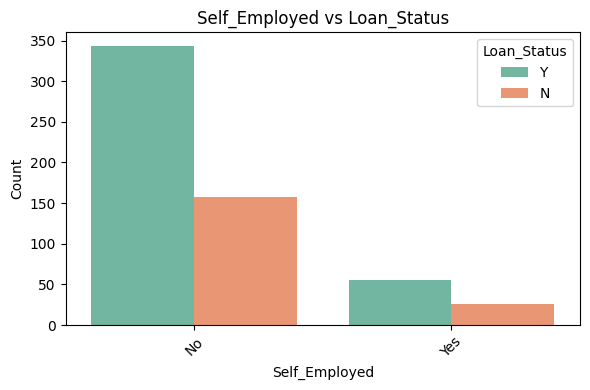

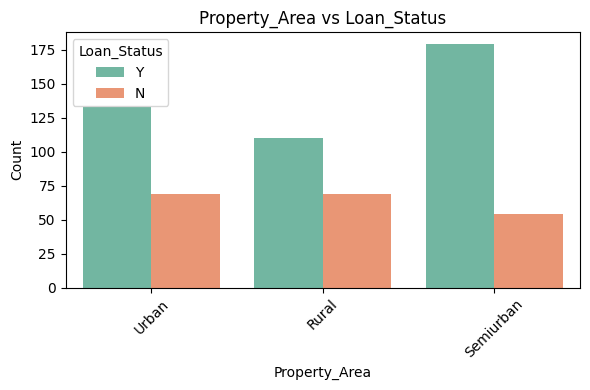

In [48]:
# 2.3
# Analyze categorical features(e.g education, employment status, property area using bar charts and pie charts).
categorical_features = df.select_dtypes(include='object').copy()
target = 'Loan_Status'

for col in categorical_features:
    if col not in ['Loan_ID', target]:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue=target, data=df, palette='Set2')
        plt.title(f'{col} vs {target}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


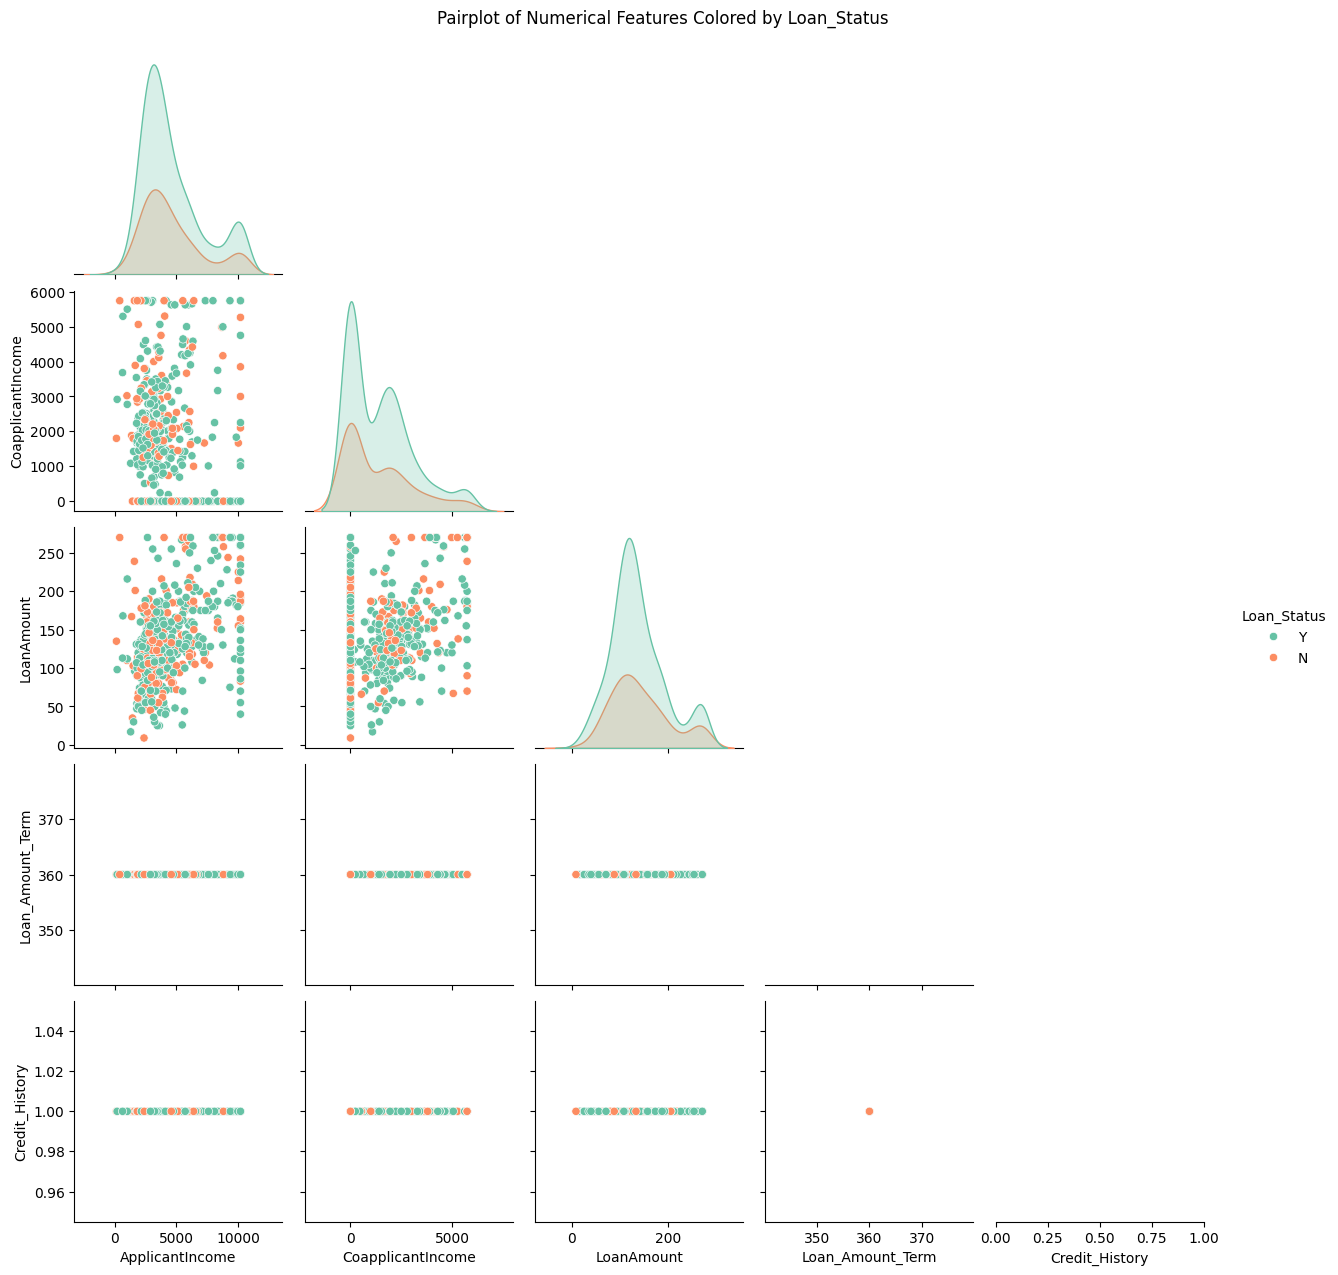

In [ ]:
# Distribution of numerical features using pairplot.
target = 'Loan_Status'

# Select only numeric features
numeric_features = df.select_dtypes(include=['number']).columns

# Pairplot for numerical features, colored by target
sns.pairplot(df, vars=numeric_features, hue=target, diag_kind='kde', corner=True, palette='Set2')
plt.suptitle(f'Pairplot of Numerical Features Colored by {target}', y=1.02)
plt.show()


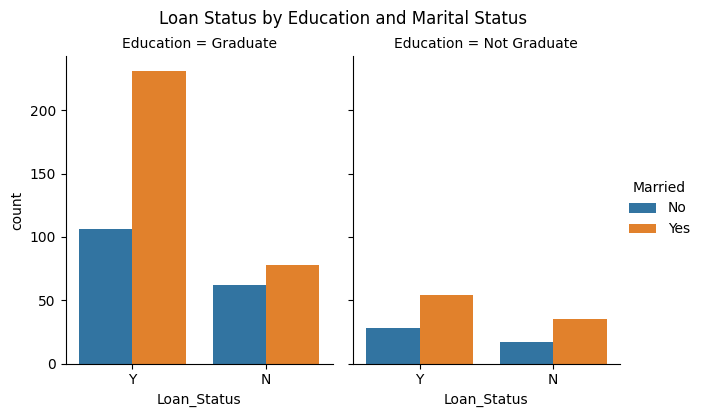

In [45]:
#Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.


g = sns.catplot(x='Loan_Status', hue='Married', col='Education',
                data=df, kind='count', height=4, aspect=0.8)
g.fig.suptitle('Loan Status by Education and Marital Status', y=1.03)
plt.show()


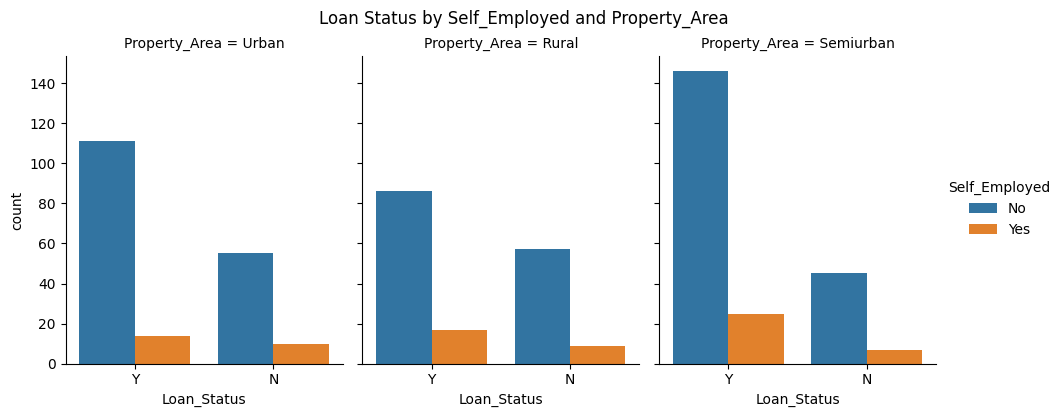

In [46]:
g = sns.catplot(x='Loan_Status', hue='Self_Employed', col='Property_Area',
                data=df, kind='count', height=4, aspect=0.8)
g.fig.suptitle('Loan Status by Self_Employed and Property_Area', y=1.03)
plt.show()

#### Phase 3: Reporting and Insights

- 3.1: Summarize key findings and insights derived from the EDA.
From the EDA done above, we can deduce the following things from them:
_ 
